<a href="https://colab.research.google.com/github/jimaguere/Electiva_1/blob/main/Guia_arbol_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ajustar un modelo para el conjunto de datos Sick. 
El conjunto de datos Sick, el cual registra enfermedades de la tiroides proporcionados 
por: el Instituto Garavan, Instituto de Nueva Gales del Sur , Syndney, Australia. El mismo recibió algunas transformaciones
 como por ejemplo el sexo en vez de ser F/M se definió como 0/1. El archivo contiene 955 estudios de pacientes,
  donde se pretende determinar si tienen o no una enfermedad. Clase(1) Enfermo Clase(0) No Enfermo.
  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

datos=pd.read_csv("/content/drive/MyDrive/ELECTIVA 1/Guia_arbol_decision/Sick.txt",sep="\t")
datos.head()

,caso,edad,genero,en_medicacion_tiroxina,consulta_sobre_tiroxina,en_medicación_antitiroidea,depresion,embarazada,cirugía_de_tiroides,I131_tratamineto,consulta_hipotiroidea,consulta_hipertiroidea,litio,enfermedad_endocrinologica_bocio,tumor,hipopituitario,transtornos,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,fuente_de_referencia,clase
0,1,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.900,2.044,129.0,1.05,123.0,5,0
1,2,51,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.250,1.900,101.0,1.08,94.0,5,0
2,3,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000,2.500,133.0,1.08,123.0,2,0
3,4,73,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.800,2.100,103.0,0.92,112.0,2,0
4,5,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.774,3.900,141.0,1.12,126.0,5,0


**1)** ¿Prepare el conjunto de datos elimine los valores incompletos para este conjunto de
datos o impute con alguna medida?.



In [3]:
datos.describe()

,caso,edad,genero,en_medicacion_tiroxina,consulta_sobre_tiroxina,en_medicación_antitiroidea,depresion,embarazada,cirugía_de_tiroides,I131_tratamineto,consulta_hipotiroidea,consulta_hipertiroidea,litio,enfermedad_endocrinologica_bocio,tumor,hipopituitario,transtornos,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,fuente_de_referencia,clase
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,494.175916,51.794764,0.336126,0.120419,0.016754,0.015707,0.035602,0.015707,0.018848,0.017801,0.058639,0.056545,0.002094,0.009424,0.026178,0.001047,0.051309,3.773681,2.039007,108.330639,0.992342,110.891749,4.269110,0.050262
std,285.184758,22.972953,0.472630,0.325621,0.128415,0.124404,0.185393,0.124404,0.136060,0.132297,0.235070,0.231091,0.045739,0.096670,0.159748,0.032359,0.220743,12.110847,0.714392,33.916230,0.189764,30.195374,1.109252,0.218599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.100000,4.800000,0.310000,5.400000,1.000000,0.000000
25%,247.500000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.530000,1.700000,88.000000,0.890000,94.000000,4.000000,0.000000
50%,492.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,2.044000,107.000000,0.992300,110.890000,5.000000,0.000000
75%,740.500000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,2.200000,123.000000,1.070000,123.000000,5.000000,0.000000
max,990.000000,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,183.000000,7.000000,430.000000,2.120000,395.000000,5.000000,1.000000


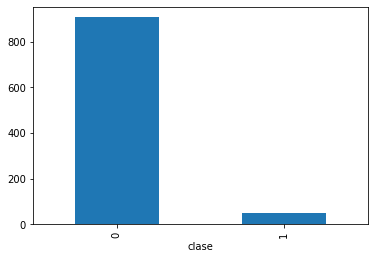

clase
0    907
1     48
Name: caso, dtype: int64

In [5]:
#Estadísticos
import matplotlib.pyplot as plt

datos.groupby('clase').count()["caso"].plot(kind='bar')
plt.show()
datos.groupby('clase').count()['caso']

In [7]:
# valores faltantes por columna
display(datos.isnull().sum())

caso                                0
edad                                0
genero                              0
en_medicacion_tiroxina              0
consulta_sobre_tiroxina             0
en_medicación_antitiroidea          0
depresion                           0
embarazada                          0
cirugía_de_tiroides                 0
I131_tratamineto                    0
consulta_hipotiroidea               0
consulta_hipertiroidea              0
litio                               0
enfermedad_endocrinologica_bocio    0
tumor                               0
hipopituitario                      0
transtornos                         0
nivel_TSH                           0
nivel_T3                            0
nivel_TT4                           0
nivel_T4U                           0
nivel_FTI                           0
fuente_de_referencia                0
clase                               0
dtype: int64

**2)** Separe la variable clase a predecir en una variable Y.

**3)** Separe un conjunto de datos denominado X que no contenga la variable nota

In [8]:
Y = datos['clase']
X = datos.drop(labels=['clase'],axis=1)

**4)** Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30
(genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó).
Indique que cantidad de casos quedaron para cada ambiente).


In [12]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print("Total ejemplos train {}.".format(X_train.shape[0]))
print("Total ejemplos test {}.".format(X_test.shape[0]))


print("Enfermos train:",y_train[y_train==1].count())
print("No Enfermos train:",y_train[y_train==0].count())

print("Enfermos test:",y_test[y_test==1].count())
print("No Enfermos test",y_test[y_test==0].count())

Total ejemplos train 668.
Total ejemplos test 287.
Enfermos train: 35
No Enfermos train: 633
Enfermos test: 13
No Enfermos test 274


**5)** Ajuste 3 modelos de diferentes profundidades (max_depth) usando el conjunto de
entrenamiento 70%.

In [51]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4
modelo1 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=100,
                                            #min_samples_leaf=10,
                                            max_depth = 4
                                           )
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
# Crear Arbol de decision con profundidad = 10
modelo2 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=100,
                                            #min_samples_leaf=10,
                                            max_depth = 10
                                           )
modelo2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
# Crear Arbol de decision con profundidad = 10
modelo3 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=100,
                                            #min_samples_leaf=10,
                                            max_depth = 20
                                           )
modelo3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**6)** Explique dos reglas de uno de los arboles generados. Explique que tan bien separa los
casos regla.



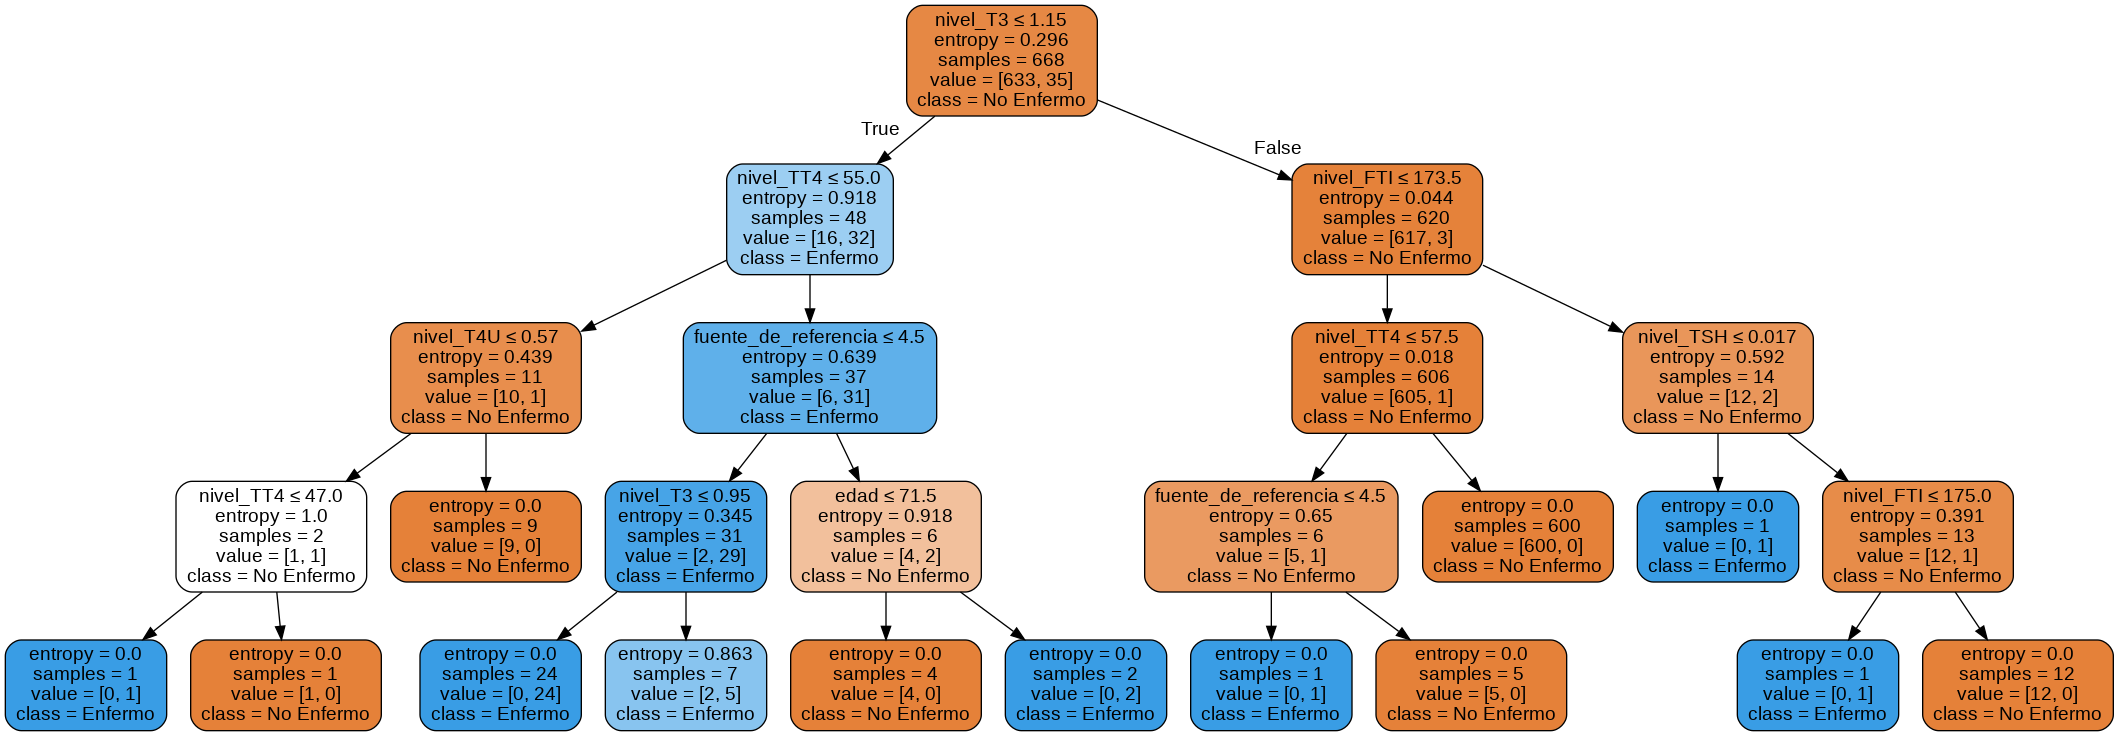

In [54]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No Enfermo','Enfermo'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

**7)** Obtener la matriz de confusión tanto para el ambiente de entrenamiento como de
Validación de los 3 modelos.


In [55]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# Función para plot de la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')

**Matriz de confusión test**

Confusion matrix, without normalization
verdaderos positivos: 12
verdaderos negativos: 269
falsos positivos: 5
falsos negativos: 1
accuracy: 0.9790940766550522
accuracy balanced: 0.9524143739472206


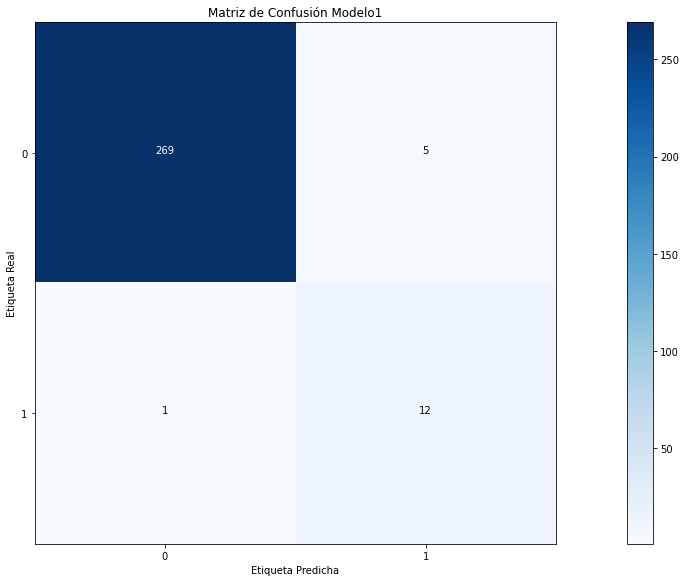

In [62]:
import numpy as np
class_names = [i for i in range(2)]

cnf_matrix = confusion_matrix(y_test, modelo1.predict(X_test)) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión Modelo1')


tn, fp, fn, tp = confusion_matrix(y_test,modelo1.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

**Matriz de confusión train**

Confusion matrix, without normalization
verdaderos positivos: 35
verdaderos negativos: 631
falsos positivos: 2
falsos negativos: 0


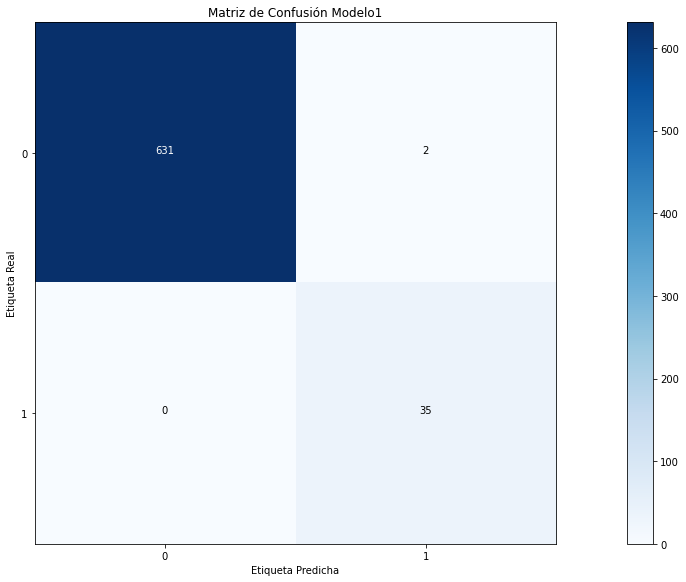

In [58]:
import numpy as np
class_names = [i for i in range(2)]

cnf_matrix = confusion_matrix(y_train, modelo1.predict(X_train)) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión Modelo1')


tn, fp, fn, tp = confusion_matrix(y_train,modelo1.predict(X_train)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)



8) Calcular el AUC y el gráfico ROC en entrenamiento y validación de los 3 modelos.

In [59]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,classification_report,balanced_accuracy_score


def eval_model(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    # Select (prediction, true label) and compute test error
    print("accuracy test:",accuracy_score(y_test, predictions_test))
    print("accuracy train:",accuracy_score(y_train, predictions_train))
    
    print("Balanced_accuracy test:",balanced_accuracy_score(y_test, predictions_test))
    print("Balanced_accuracy train:",balanced_accuracy_score(y_train, predictions_train))
      
    return (balanced_accuracy_score(y_test, predictions_test))
print("_________________________________________")
print("Modelo 1")
eval_model(X_test,X_train,y_test,y_train,modelo1)
print("_________________________________________")
print("Modelo 2")
eval_model(X_test,X_train,y_test,y_train,modelo2)
print("_________________________________________")
print("Modelo 3")
eval_model(X_test,X_train,y_test,y_train,modelo3)
print("_________________________________________")

_________________________________________
Modelo 1
accuracy test: 0.9790940766550522
accuracy train: 0.9970059880239521
Balanced_accuracy test: 0.9524143739472206
Balanced_accuracy train: 0.9984202211690363
_________________________________________
Modelo 2
accuracy test: 0.9686411149825784
accuracy train: 1.0
Balanced_accuracy test: 0.8370297585626052
Balanced_accuracy train: 1.0
_________________________________________
Modelo 3
accuracy test: 0.9651567944250871
accuracy train: 1.0
Balanced_accuracy test: 0.8352049410443572
Balanced_accuracy train: 1.0
_________________________________________


9) ¿Cuál de los 3 modelos generados es el mejor para predecir?

Modelo1


10) ¿Cuál de los 3 modelos generados consideran que es Funes el memorioso?

Modelo2 o Modelo3

**11)** Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la siguiente lógica. Entregue los resultados indicados:
 Al azar e indique la cantidad de individuos que están enfermos.
 Utilizando el mejor modelo desarrollado en el punto e indique la cantidad de
individuos que están enfermos.


**cantidad de individuos Enfermos al azar**

In [147]:
n=len(y_test)

# n ---->100
# ?----->25
n_25=(n*25)/100

print("Total datos test:",n)
print("25% de los individuos en el ambiente de test:",int(n_25))
y_test_25=y_test.sample(int(n_25))
print("Cantidad de enfermos alzar 25% test:",y_test_25[y_test_25==1].count())
#y_test.sample(n=25)

Total datos test: 287
25% de los individuos en el ambiente de test: 71
Cantidad de enfermos alzar 25% test: 2


**cantidad de individuos Enfermos usando el Modelo**

In [158]:
probs_test = modelo1.predict_proba(X_test)    
y_pred_test= modelo1.predict(X_test)    

data_set_test=X_test.copy()

data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['predicho']=y_pred_test
data_set_test['real']=y_test

data_set_test.sort_values(['predicho_prob_1'],ascending=[False]).head(10)


,caso,edad,genero,en_medicacion_tiroxina,consulta_sobre_tiroxina,en_medicación_antitiroidea,depresion,embarazada,cirugía_de_tiroides,I131_tratamineto,consulta_hipotiroidea,consulta_hipertiroidea,litio,enfermedad_endocrinologica_bocio,tumor,hipopituitario,transtornos,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,fuente_de_referencia,predicho_prob_1,predicho_prob_0,predicho,real
913,168,75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.400,0.200,78.0,0.5600,139.00,4,1.0,0.0,1,1
759,834,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.015,2.900,198.0,0.9100,217.00,2,1.0,0.0,1,0
946,733,89,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800,0.600,101.0,0.7300,138.00,4,1.0,0.0,1,1
678,746,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.015,6.000,250.0,0.8000,312.00,5,1.0,0.0,1,0
944,651,81,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.900,0.300,102.0,0.9600,106.00,4,1.0,0.0,1,1
200,219,70,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.005,3.500,194.0,0.9000,215.00,5,1.0,0.0,1,0
351,385,76,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.005,2.044,143.0,0.7600,189.00,5,1.0,0.0,1,0
386,424,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.015,4.800,22.0,0.9923,110.89,4,1.0,0.0,1,0
943,650,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500,0.800,87.0,0.8900,98.00,4,1.0,0.0,1,1
926,323,21,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.250,1.300,54.0,1.0700,51.00,4,1.0,0.0,1,1


In [159]:
y_test_modelo=data_set_test.sort_values(['predicho_prob_1'], ascending=[False])[0:y_test_25.count()]
print("Cantidad de enfermos modelo 25% test",len(y_test_modelo[y_test_modelo['real'] == 1]))

print("Cantidad individuos modelo:",len(y_test_modelo))
print("Cantidad individuos alzar:",len(y_test_25))


Cantidad de enfermos modelo 25% test 12
Cantidad individuos modelo: 71
Cantidad individuos alzar: 71
